In [1]:
import json
import pandas as pd
import matplotlib.pyplot as pl

df = pd.read_json('chido.json')

In [2]:
print(df)

   abuseConfidenceScore countryCode         countryName       domain  \
0                   100          CN               China  sinotmt.com   
1                   100          IN               India         None   
2                   100          RU  Russian Federation  changway.hk   

  hostnames       ipAddress  ipVersion  isPublic  isWhitelisted  \
0        []    111.229.4.66          4      True          False   
1        []  103.198.10.145          4      True          False   
2        []   92.255.85.237          4      True          False   

                                                 isp  \
0         Beijing Faster Internet Technology Co. Ltd   
1  SCO 1-4 PPR Mall 4th Floor Jalandhar City Cent...   
2                 Chang Way Technologies Co. Limited   

              lastReportedAt  numDistinctUsers  \
0  2021-12-23T00:00:11+00:00                98   
1  2021-12-22T23:32:29+00:00                12   
2  2021-12-23T00:45:59+00:00               470   

                

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   abuseConfidenceScore  3 non-null      int64 
 1   countryCode           3 non-null      object
 2   countryName           3 non-null      object
 3   domain                2 non-null      object
 4   hostnames             3 non-null      object
 5   ipAddress             3 non-null      object
 6   ipVersion             3 non-null      int64 
 7   isPublic              3 non-null      bool  
 8   isWhitelisted         3 non-null      bool  
 9   isp                   3 non-null      object
 10  lastReportedAt        3 non-null      object
 11  numDistinctUsers      3 non-null      int64 
 12  reports               3 non-null      object
 13  totalReports          3 non-null      int64 
 14  usageType             3 non-null      object
dtypes: bool(2), int64(4), object(9)
memory usage

In [7]:
df = df.drop(columns=["numDistinctUsers", "totalReports", "usageType"], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   abuseConfidenceScore  3 non-null      int64 
 1   countryCode           3 non-null      object
 2   countryName           3 non-null      object
 3   domain                2 non-null      object
 4   hostnames             3 non-null      object
 5   ipAddress             3 non-null      object
 6   ipVersion             3 non-null      int64 
 7   isPublic              3 non-null      bool  
 8   isWhitelisted         3 non-null      bool  
 9   isp                   3 non-null      object
 10  lastReportedAt        3 non-null      object
 11  reports               3 non-null      object
dtypes: bool(2), int64(2), object(8)
memory usage: 374.0+ bytes


In [9]:
print(df.reset_index()[['abuseConfidenceScore', 'countryName','ipAddress','isp']])

   abuseConfidenceScore         countryName       ipAddress  \
0                   100               China    111.229.4.66   
1                   100               India  103.198.10.145   
2                   100  Russian Federation   92.255.85.237   

                                                 isp  
0         Beijing Faster Internet Technology Co. Ltd  
1  SCO 1-4 PPR Mall 4th Floor Jalandhar City Cent...  
2                 Chang Way Technologies Co. Limited  


In [10]:
df.to_csv('pandaexport2.csv')

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   abuseConfidenceScore  3 non-null      int64 
 1   countryCode           3 non-null      object
 2   countryName           3 non-null      object
 3   domain                2 non-null      object
 4   hostnames             3 non-null      object
 5   ipAddress             3 non-null      object
 6   ipVersion             3 non-null      int64 
 7   isPublic              3 non-null      bool  
 8   isWhitelisted         3 non-null      bool  
 9   isp                   3 non-null      object
 10  lastReportedAt        3 non-null      object
 11  reports               3 non-null      object
dtypes: bool(2), int64(2), object(8)
memory usage: 374.0+ bytes
None


In [12]:
df

,abuseConfidenceScore,countryCode,countryName,domain,hostnames,ipAddress,ipVersion,isPublic,isWhitelisted,isp,lastReportedAt,reports
0,100,CN,China,sinotmt.com,[],111.229.4.66,4,True,False,Beijing Faster Internet Technology Co. Ltd,2021-12-23T00:00:11+00:00,"[{'categories': [18, 22], 'comment': 'Dec 23 0..."
1,100,IN,India,None,[],103.198.10.145,4,True,False,SCO 1-4 PPR Mall 4th Floor Jalandhar City Cent...,2021-12-22T23:32:29+00:00,"[{'categories': [18], 'comment': '$f2bV_matche..."
2,100,RU,Russian Federation,changway.hk,[],92.255.85.237,4,True,False,Chang Way Technologies Co. Limited,2021-12-23T00:45:59+00:00,"[{'categories': [18, 22], 'comment': 'Dec 23 0..."


IndexError: index 0 is out of bounds for axis 0 with size 0

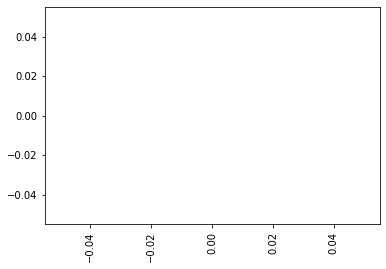

In [16]:
plot_data= df[df['ipAddress']=="countryName"]
plot_data= plot_data.groupby('countryName')['ipAddress'].count()
plot_data.sort_values()[-10:].plot(kind='bar')
pl.title('Top ten Countries')
pl.ylabel('Unique IP Addresses')